In [ ]:
import pandas as pd
import numpy as np
import io
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving global_warming_dataset.csv to global_warming_dataset.csv


In [ ]:
gw_df = pd.read_csv(io.BytesIO(uploaded['global_warming_dataset.csv']))
print(gw_df.head())

# Data Cleaning: Drop duplicates and handle missing values
gw_df = gw_df.drop_duplicates().dropna()

       Country  Year  Temperature_Anomaly  CO2_Emissions    Population  \
0  Country_103  1913            -1.163537   8.876061e+08  1.627978e+08   
1  Country_180  1950            -0.432122   4.497517e+08  4.281359e+08   
2   Country_93  2014             0.444954   4.579080e+08  4.926732e+08   
3   Country_15  2020            -1.171616   5.049503e+08  1.252169e+09   
4  Country_107  1964            -0.564038   6.898891e+08  2.932960e+08   

   Forest_Area           GDP  Renewable_Energy_Usage  Methane_Emissions  \
0    54.872178  6.139887e+12               76.710013       8.317626e+06   
1    84.051006  2.601447e+12               68.450021       6.206540e+06   
2    72.295357  5.192677e+12               36.725699       1.056885e+06   
3    17.259684  8.252128e+12               77.547901       1.986813e+06   
4    44.438605  8.560746e+12               10.019576       3.313252e+06   

   Sea_Level_Rise  ...  Waste_Management  Per_Capita_Emissions  \
0        8.111839  ...         82.6914

In [ ]:
# Feature Selection and Normalization
X = gw_df.drop(columns=['Average_Temperature', 'Country', 'Year'])  # Features, drop non-numerical columns
y = gw_df['Average_Temperature']  # Target variable

# Normalize numerical features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Standardize the features
std_scaler = StandardScaler()
X_standardized = std_scaler.fit_transform(X_scaled)

# Standardize target variable
y = (y - y.mean()) / y.std()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Build the TensorFlow model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model with a lower learning rate and different loss function
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='msle', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR2 Score: {r2}")



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.1692 - mae: 0.9768 - val_loss: 0.1272 - val_mae: 0.8984
Epoch 2/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.1256 - mae: 0.9006 - val_loss: 0.1267 - val_mae: 0.8966
Epoch 3/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 0.1254 - mae: 0.8995 - val_loss: 0.1265 - val_mae: 0.8968
Epoch 4/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 0.1262 - mae: 0.8987 - val_loss: 0.1263 - val_mae: 0.8967
Epoch 5/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.1264 - mae: 0.9019 - val_loss: 0.1263 - val_mae: 0.8977
Epoch 6/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.1258 - mae: 0.9008 - val_loss: 0.1263 - val_mae: 0.8960
Epoch 7/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.1257 - mae: 0.9016 - val_loss: 0.1264 - val_mae: 0.8955
Epoch 8/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 0.1256 - mae: 0.8985 - val_loss: 0.1263 - val_mae: 0.8973
Epoch 9/50
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

625/625 - 1s - 2ms/step - loss: 0.1292 - mae: 0.8942
Loss: 0.1292208731174469, Accuracy: 0.8942106366157532


Q4: How does renewable energy adoption impact CO2 emissions reduction?


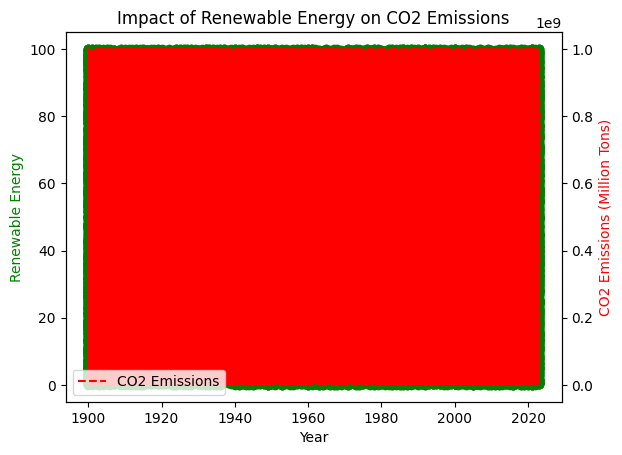

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and an axes object
fig, ax1 = plt.subplots()

# Now you can create the twin axis
ax2 = ax1.twinx()

ax1.plot(df['Year'], df['Renewable_Energy_Usage'], color='g', marker='o', label='Renewable Energy')
ax2.plot(df['Year'], df['CO2_Emissions'], color='r', linestyle='dashed', label='CO2 Emissions')

ax1.set_xlabel("Year")
ax1.set_ylabel("Renewable Energy", color='g')
ax2.set_ylabel("CO2 Emissions (Million Tons)", color='r')
plt.title("Impact of Renewable Energy on CO2 Emissions")
plt.legend()
plt.show()

Q5: Which factors contribute the most to predicting sea-level rise?

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'X' (features) and 'y' (sea level rise) are prepared
model = RandomForestRegressor()
model.fit(X, y)

# Feature importance plot
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.xlabel("Importance")
plt.ylabel("Factors")
plt.title("Top Contributing Factors to Sea-Level Rise")
plt.show()

Q6: Can clustering techniques identify groups of countries with similar environmental policies?

In [1]:
# Generate predictions (assuming trained model)
# Assuming X contains relevant policy indicators
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Scatter plot
sns.scatterplot(x=df['Policy_Indicator1'], y=df['Policy_Indicator2'], hue=df['Cluster'], palette='viridis')
plt.title("Clustering Countries Based on Environmental Policies")
plt.show()

NameError: name 'model' is not defined